In [59]:
import numpy as np
import pandas as pd

In [76]:
# Keras fashion mnist dataset을 다운로드
from tensorflow.keras.datasets import fashion_mnist, mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [77]:
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


Text(0.5, 1.0, '5')

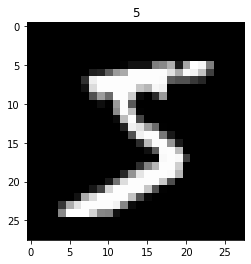

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

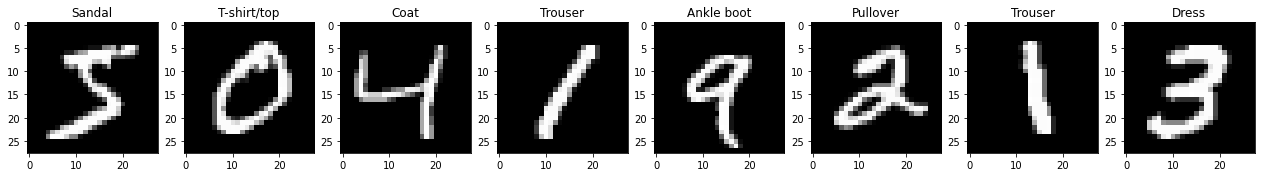

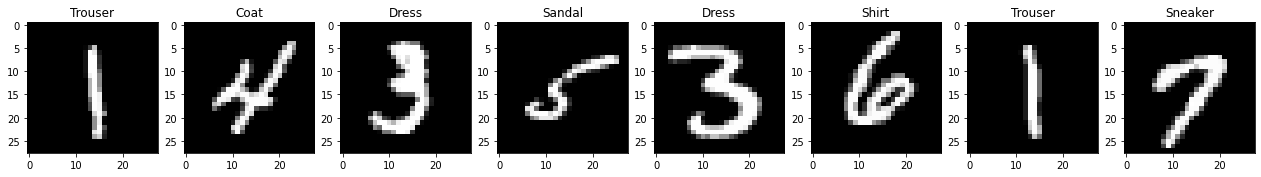

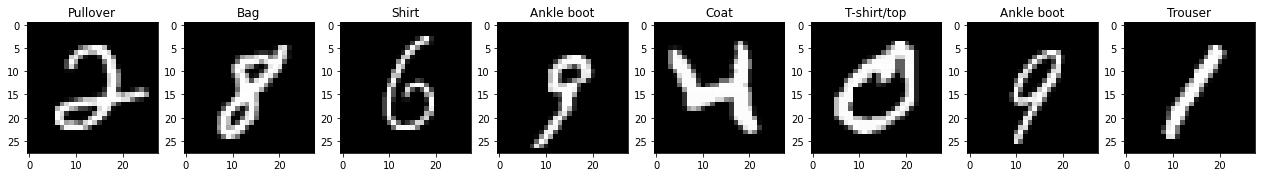

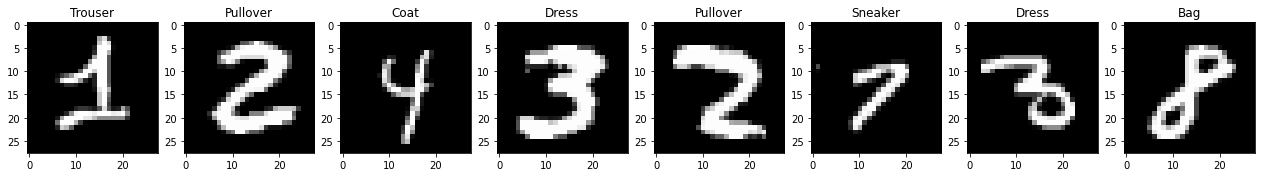

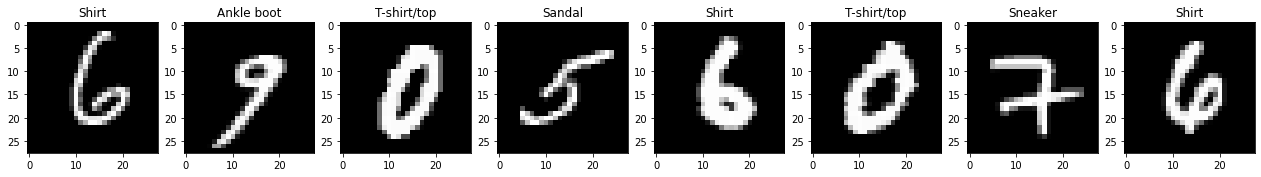

In [79]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])


for i in range(0,40,8):
    show_images(train_images[i:i+8], train_labels[i:i+8], ncols=8)

In [80]:
# 데이터 전처리 (minmaxsclar)
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


## Dense Layer 모델

- Dense Layer는 1차원밖에 못 받음. 2차원 이미지 1차원으로 변환해야함
- 분류 대상이 이미지에서 고정된 위치에 있는 경우는 나름 잘 나옴
- 이미지 크기도 작아야 (flatten해야하는데 이미지 크기 크면 연산 수 어마무시해짐)

In [81]:
INPUT_SIZE = 28

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [82]:
model = Sequential([Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation="relu"),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [83]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=["accuracy"])

In [84]:
# categorical_crossentropy는 라벨 원핫 인코딩 필요
# 원핫인코딩 안하고 바로 쓸려면 sparse_categorical_crossentropy
# 파라미터가 numpy의 array면 바로 아래 모듈 사용 가능

from tensorflow.keras.utils import to_categorical
train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [85]:
history = model.fit(x=train_images, y=train_oh_labels, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4834 - accuracy: 0.8544
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1232 - accuracy: 0.9642
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0825 - accuracy: 0.9749
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0605 - accuracy: 0.9809
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0462 - accuracy: 0.9853
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0376 - accuracy: 0.9885: 0s - loss: 0.0374 - accuracy
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0311 - accuracy: 0.9903
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0260 - accuracy: 0.9920
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0229 - accuracy: 0.9922
Epoch 10/20
1875/1875 [=============================

In [86]:
pred_proba = model.predict(test_images)
pred_proba

array([[3.4258403e-12, 5.0897099e-12, 5.6628513e-12, ..., 9.9994957e-01,
        6.7038725e-13, 3.9324360e-13],
       [6.2008267e-18, 4.2475216e-21, 1.0000000e+00, ..., 7.2498936e-24,
        2.5127719e-23, 3.6884263e-35],
       [6.1875433e-10, 9.9999523e-01, 7.4266495e-07, ..., 3.7716356e-06,
        1.4354852e-07, 7.5214722e-12],
       ...,
       [7.5705234e-21, 1.6335328e-16, 3.7594347e-22, ..., 1.2760418e-15,
        2.3720222e-15, 1.4129772e-12],
       [3.2603528e-22, 8.8412893e-21, 2.3686362e-26, ..., 6.0493245e-21,
        2.1713988e-15, 5.0085197e-24],
       [9.2280741e-18, 1.5983588e-18, 3.5347341e-15, ..., 4.9253102e-22,
        2.8875585e-19, 4.3254719e-19]], dtype=float32)

## CNN

In [90]:
import numpy as np
import pandas as pd

### CIFAR10 Dataset 생성 (라벨이 100개인 데이터도 있음)

In [93]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

170500096/170498071 [==============================] - 392s 2us/step
train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


### array로 첫번째 이미지 출력

In [114]:
train_images[0], train_labels[0]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

Text(0.5, 1.0, '[6]')

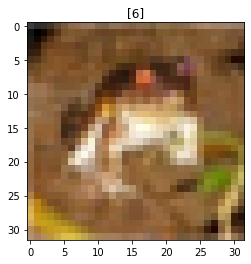

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='jet')
plt.title(train_labels[0])

### cifar10 데이터 시각화

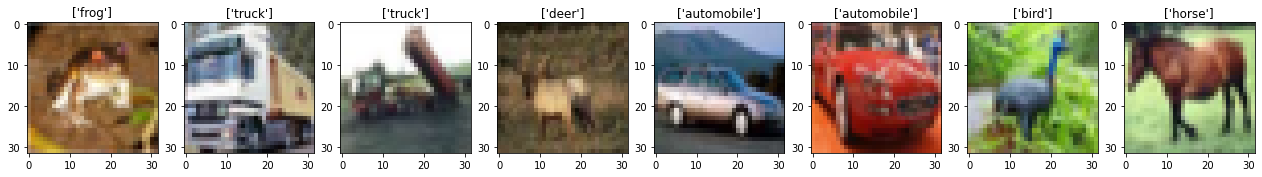

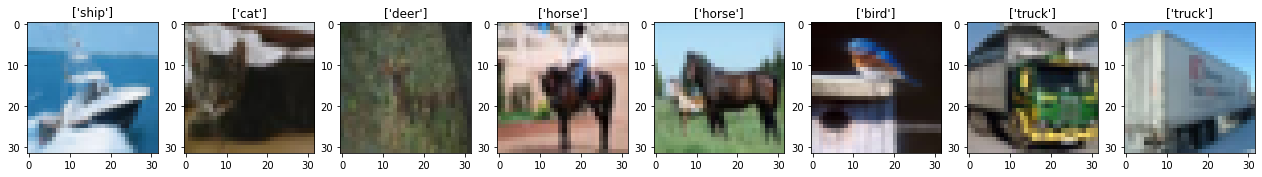

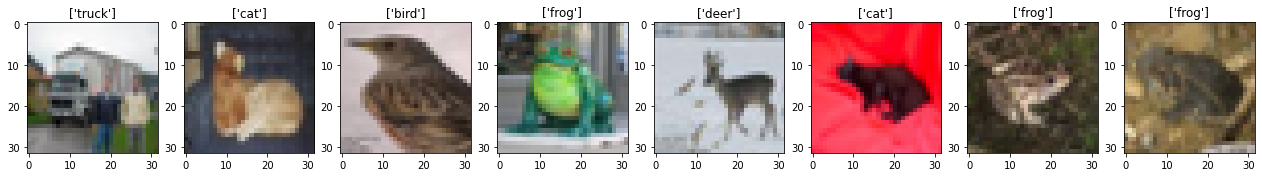

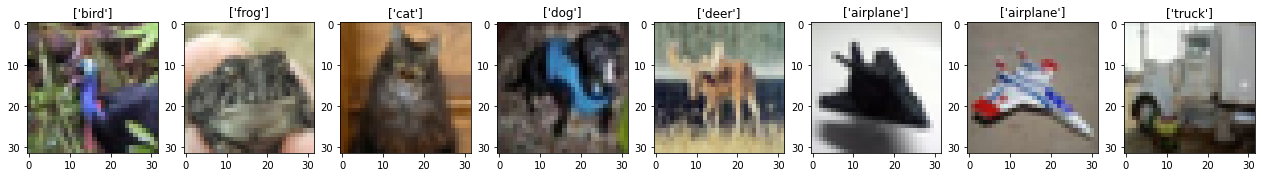

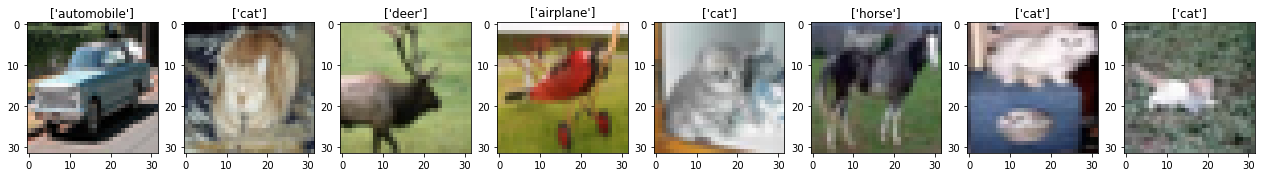

In [115]:
names = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='jet')
        label = labels[i].squeeze() # 2차원 값을 1차원으로 변환
        axs[i].set_title(names[labels[i]])


for i in range(0,40,8):
    show_images(train_images[i:i+8], train_labels[i:i+8], ncols=8)

In [116]:
# 데이터 전처리 (minmaxsclar)
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


In [118]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

### Custom Model 생성

In [119]:
image_size = 32

In [120]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop

In [125]:
input_tensor = Input(shape=(image_size, image_size, 3))

# filters는 input_shape와 관계 없이 아무거나 넣어도 상관 없음
# x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
# stride 도 따로 설정 가능한데, 안 넣어주면 자동으로 pool_size를 stride로 가져옴
# MaxPooling2D(pool_size=(2,2), strides=(2,2))

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)
# pool_size 뒤에 행렬 형태가 아닌 숫자만 넣으면, 자동으로 정사각행렬로 인식

x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

In [126]:
# Name은 아무거나 넣어도 됨. 나중에 해당 세션 정보 확인할 때 편할려고 단계에 이름 붙여주는 것
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
activation (Activation)      (None, 16, 16, 32)        0     

In [130]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [131]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=10, validation_split=0.15)

Epoch 1/10
665/665 [==============================] - 194s 291ms/step - loss: 1.9374 - accuracy: 0.2645 - val_loss: 1.3090 - val_accuracy: 0.5252
Epoch 2/10
665/665 [==============================] - 217s 326ms/step - loss: 1.2836 - accuracy: 0.5359 - val_loss: 1.0244 - val_accuracy: 0.6393
Epoch 3/10
665/665 [==============================] - 230s 346ms/step - loss: 1.0489 - accuracy: 0.6254 - val_loss: 0.8823 - val_accuracy: 0.6899
Epoch 4/10
665/665 [==============================] - 216s 325ms/step - loss: 0.9078 - accuracy: 0.6751 - val_loss: 0.8460 - val_accuracy: 0.7059
Epoch 5/10
665/665 [==============================] - 189s 284ms/step - loss: 0.8238 - accuracy: 0.7066 - val_loss: 0.7628 - val_accuracy: 0.7349
Epoch 6/10
665/665 [==============================] - 219s 330ms/step - loss: 0.7554 - accuracy: 0.7352 - val_loss: 0.7802 - val_accuracy: 0.7248
Epoch 7/10
665/665 [==============================] - 230s 347ms/step - loss: 0.7139 - accuracy: 0.7480 - val_loss: 0.7053 -